In [164]:
%matplotlib notebook

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
data_2017 = "survey_2017.csv"
df_17 = pd.read_csv(data_2017)

data_2016 = "survey_2016.csv"
df_16 = pd.read_csv(data_2016)

data_2014 = "survey_2014.csv"
df_14 = pd.read_csv(data_2014)

data_2018 = "survey_2018.csv"
df_18 = pd.read_csv(data_2018)

data_2019 = "survey_2019.csv"
df_19 = pd.read_csv(data_2019)

In [167]:
interview_2014 = df_14["Would you bring up a mental health issue with a potential employer in an interview?"]
interview_2016 = df_16["Would you bring up a mental health issue with a potential employer in an interview?"]
interview_2017 = df_17["Would you bring up your mental health with a potential employer in an interview?"]
interview_2018 = df_18["Would you bring up your mental health with a potential employer in an interview?"]
interview_2019 = df_19["Would you bring up your *mental* health with a potential employer in an interview?"]

In [168]:
years_df = pd.DataFrame({
    "interview 14": interview_2014,
    "interview 16": interview_2016,
    "interview 17": interview_2017,
    "interview 18": interview_2018,
    "interview 19": interview_2019
})

In [169]:
years_df

,interview 14,interview 16,interview 17,interview 18,interview 19
0,No,Maybe,No,No,Maybe
1,No,No,No,No,No
2,Yes,Yes,No,No,No
3,Maybe,Maybe,No,No,No
4,Yes,No,No,Yes,No
...,...,...,...,...,...
1428,NaN,No,NaN,NaN,NaN
1429,NaN,No,NaN,NaN,NaN
1430,NaN,No,NaN,NaN,NaN
1431,NaN,No,NaN,NaN,NaN


In [170]:
df = years_df.apply(pd.Series.value_counts)

In [171]:
df

,interview 14,interview 16,interview 17,interview 18,interview 19
No,1009,883,524,297,238
Maybe,207,438,194,100,97
Yes,44,112,38,20,17


In [172]:
df['pct_2014'] = df['interview 14']/df['interview 14'].sum()*100

In [173]:
df['pct_2016'] = df['interview 16']/df['interview 16'].sum()*100

In [174]:
df['pct_2017'] = df['interview 17']/df['interview 17'].sum()*100

In [175]:
df['pct_2018'] = df['interview 18']/df['interview 18'].sum()*100

In [176]:
df['pct_2019'] = df['interview 19']/df['interview 19'].sum()*100

In [177]:
df

,interview 14,interview 16,interview 17,interview 18,interview 19,pct_2014,pct_2016,pct_2017,pct_2018,pct_2019
No,1009,883,524,297,238,80.079365,61.618981,69.312169,71.223022,67.613636
Maybe,207,438,194,100,97,16.428571,30.565248,25.661376,23.980815,27.556818
Yes,44,112,38,20,17,3.492063,7.815771,5.026455,4.796163,4.829545


In [180]:
plot_df = df[['pct_2014', 'pct_2016','pct_2017','pct_2018','pct_2019']]

In [181]:
plot_df

,pct_2014,pct_2016,pct_2017,pct_2018,pct_2019
No,80.079365,61.618981,69.312169,71.223022,67.613636
Maybe,16.428571,30.565248,25.661376,23.980815,27.556818
Yes,3.492063,7.815771,5.026455,4.796163,4.829545


In [182]:
#plot_df = plot_df.reset_index()
#plot_df

In [183]:
1. pull out the maybes as a series
2. pull out the yes as another series
3. pull out the nos as another series

maybe try a groupby or loc function to get above

then plot the x

SyntaxError: invalid syntax (<ipython-input-183-b89db752d745>, line 1)

In [184]:
maybe_df = plot_df.loc['Maybe', :]
maybe_df_q = pd.DataFrame(data=maybe_df)
maybe_df_q = maybe_df_q.reset_index()
maybe_df_q

,index,Maybe
0,pct_2014,16.428571
1,pct_2016,30.565248
2,pct_2017,25.661376
3,pct_2018,23.980815
4,pct_2019,27.556818


In [185]:
no_df = plot_df.loc['No', :]
no_df
no_df_q = pd.DataFrame(data=no_df)
no_df_q = no_df_q.reset_index()
no_df_q

,index,No
0,pct_2014,80.079365
1,pct_2016,61.618981
2,pct_2017,69.312169
3,pct_2018,71.223022
4,pct_2019,67.613636


In [186]:
Yes_df = plot_df.loc['Yes', :]
Yes_df
yes_df_q = pd.DataFrame(data=Yes_df)
yes_df_q = yes_df_q.reset_index()
yes_df_q

,index,Yes
0,pct_2014,3.492063
1,pct_2016,7.815771
2,pct_2017,5.026455
3,pct_2018,4.796163
4,pct_2019,4.829545


<IPython.core.display.Javascript object>


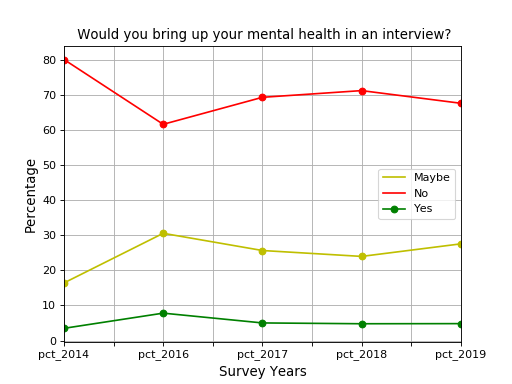

In [214]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
#ax=ax2 

maybe_df_q.plot(x="index", y=["Maybe"], ax=ax, marker='o', color='y')
no_df_q.plot(x="index", y=["No"], ax=ax, marker='o', color='r')
yes_df_q.plot(x="index", y=["Yes"], ax=ax, marker='o', color='g')
plt.grid()
#yes_df_q.plot(x="index", y=["Yes"], ax=ax2, ls="--", color='g')
plt.title(' Would you bring up your mental health in an interview?')
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Survey Years', fontsize=12)
plt.show()
plt.savefig("Images/14_16_17_18_19_mentalhealth_interview.png")